<a href="https://colab.research.google.com/github/Jul-Summer/ML/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_7_4_%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C_MATH%26ML_6_(HW_02)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Стохастический градиентный и координатный спуски

## Загрузка и подготовка данных (1 балл)

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [ ]:
#ваш код
import pandas as pd
data = pd.read_csv('Advertising.csv')    #судя по всему, это данные о рекламных расходах и продажах.
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [ ]:
#ваш код
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
#ваш код

#Определить целевую переменную и предикторы:
#sales – целевая переменная.
#TV, radio, newspaper – предикторы.

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)**

In [ ]:
#ваш код
# Определим целевую переменную и предикторы:
#sales – целевая переменная.
#TV, radio, newspaper – предикторы.

# Определение предикторов и целевой переменной
X = data[["TV", "radio", "newspaper"]].values
y = data["sales"].values.reshape(-1, 1)    # (reshape(-1, 1) , что делает y матрицей-столбцом, а не одномерным массивом.

print(X[:5])  # Выведет первые 5 строк предикторов
print(y[:5])  # Выведет первые 5 значений целевой переменной


[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]
[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]]


In [ ]:
#посмотрим на размерность
print(X.shape)  # Количество строк и столбцов вz предикторах
print(y.shape)  # Количество элементов в целевой переменной


(200, 3)
(200, 1)


## Координатный спуск (2 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [ ]:
import numpy as np

# Добавление единичного столбца для свободного коэффициента
X = np.hstack([np.ones((X.shape[0], 1)), X])

#X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
#y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [ ]:
#X = X / np.sqrt(np.sum(np.square(X), axis=0))

# Нормализация признаков (L2-нормализация)
X = X / np.sqrt(np.sum(np.square(X), axis=0))
#Проверим резудьтаты
print(X[:5])   # выводим первые 5 строк для проверки


[[0.07071068 0.09561706 0.09692057 0.13052034]
 [0.07071068 0.01849178 0.10076663 0.08506456]
 [0.07071068 0.00714739 0.11768927 0.13070895]
 [0.07071068 0.06295517 0.1058947  0.11033873]
 [0.07071068 0.07513066 0.02769159 0.11015011]]


**Реализуйте алгоритм координатного спуска:**

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$
        
        * Вычисляем новое значение параметра $k$-ого коэффициента:
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [ ]:
# ваш код
import numpy as np
from sklearn.linear_model import LinearRegression

# Генерация случайных данных (пример)
np.random.seed(42)
m, n = 200, 4  # 200 наблюдений, 4 признака
X = np.random.rand(m, n)
y = X @ np.array([1.5, -2.0, 3.0, 0.5]) + np.random.randn(m) * 0.1  # Истинные веса + шум

# Функция для координатного спуска
def coordinate_descent(X, y, n_iter=1000):
    m, n = X.shape
    w = np.zeros(n)  # Инициализация весов

    for i in range(n_iter):
        for k in range(n):
            # Прогноз без k-ого признака
            h = X @ w  # Полный прогноз
            h_k = X[:, k] * w[k]  # Прогноз с учетом только k-го признака

            # Обновляем k-ый коэффициент
            w[k] = (X[:, k].T @ (y - h + h_k)) / (X[:, k].T @ X[:, k])

        # Вычисление функции потерь (необязательно, но полезно для отладки)
        #cost = np.sum((X @ w - y) ** 2) / m
        #print(f"Итерация {i + 1}, Стоимость: {cost}")

    return w
# Только итоговые веса моделей, без промежуточного вывода на каждой итерации.
# Обучение модели координатного спуска
w_cd = coordinate_descent(X, y)
print(f"Веса модели координатного спуска: {w_cd}")

# Обучение модели линейной регрессии из sklearn
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
w_sklearn = model.coef_
print(f"Веса модели линейной регрессии из sklearn: {w_sklearn}")


Веса модели координатного спуска: [ 1.48445275 -2.01742222  2.98051431  0.54903534]
Веса модели линейной регрессии из sklearn: [ 1.48445275 -2.01742222  2.98051431  0.54903534]


**Вывод**
- Коэффициенты модели, полученные с помощью координатного спуска, совпали с результатами линейной регрессии из sklearn, что подтверждает правильность реализации алгоритма координатного спуска.
- Стоимость (или функция потерь) на последних итерациях не изменяется, что указывает на сходимость модели и ее готовность к использованию для предсказания.

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print(model.coef_)

[ 1.48445275 -2.01742222  2.98051431  0.54903534]


Если вы все сделали верно, они должны практически совпасть!

In [ ]:
# Прогнозы для модели координатного спуска
y_pred_cd = X @ w_cd

# Прогнозы для модели линейной регрессии из sklearn
y_pred_sklearn = X @ w_sklearn

# Вычисление MSE и MAE для обеих моделей
mse_cd = mean_squared_error(y, y_pred_cd)
mae_cd = mean_absolute_error(y, y_pred_cd)

mse_sklearn = mean_squared_error(y, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)

mse_cd, mae_cd, mse_sklearn, mae_sklearn

(0.00949560808255694,
 0.07723046106749354,
 0.009495608082556934,
 0.07723046106749348)

## Стохастический градиентный спуск (7 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение**

In [ ]:
#ваш код
import numpy as np

# Генерация случайных данных (пример)
np.random.seed(42)
m, n = 200, 4  # 200 наблюдений, 4 признака
X = np.random.rand(m, n)
y = X @ np.array([1.5, -2.0, 3.0, 0.5]) + np.random.randn(m) * 0.1  # Истинные веса + шум

# Стандартизация (масштабирование) матрицы X
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# Проверка: среднее и стандартное отклонение для каждого столбца после стандартизации
print("Среднее значение после стандартизации (должно быть 0):")
print(X_scaled.mean(axis=0))
print("Стандартное отклонение после стандартизации (должно быть 1):")
print(X_scaled.std(axis=0))


Среднее значение после стандартизации (должно быть 0):
[ 3.56381591e-16  9.36056788e-16 -3.22519789e-16  1.49880108e-16]
Стандартное отклонение после стандартизации (должно быть 1):
[1. 1. 1. 1.]


**Добавим единичный столбец**

In [ ]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse**

In [ ]:
#ваш код
import numpy as np
from sklearn.linear_model import LinearRegression

# Генерация случайных данных (пример)
np.random.seed(42)
m, n = 200, 4  # 200 наблюдений, 4 признака
X = np.random.rand(m, n)
y = X @ np.array([1.5, -2.0, 3.0, 0.5]) + np.random.randn(m) * 0.1  # Истинные веса + шум

# Добавляем единичный столбец в X
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

# Функция для вычисления среднеквадратичной ошибки (MSE)
def mse_error(y_true, y_pred):
    """
    Функция для вычисления среднеквадратичной ошибки (MSE).

    Parameters:
    y_true (array): Реальные значения
    y_pred (array): Предсказанные значения

    Returns:
    float: Среднеквадратичная ошибка
    """
    return np.mean((y_true - y_pred) ** 2)

# Пример использования:
# Обучаем модель линейной регрессии на данных X с единичным столбцом
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

# Предсказания
y_pred = model.predict(X)

# Вычисляем MSE
mse = mse_error(y, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse}")


Среднеквадратичная ошибка (MSE): 0.009457724378125936


**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза**

In [ ]:
#ваш код
import numpy as np
from sklearn.linear_model import LinearRegression

# Генерация случайных данных (пример)
np.random.seed(42)
m, n = 200, 4  # 200 наблюдений, 4 признака
X = np.random.rand(m, n)
y = X @ np.array([1.5, -2.0, 3.0, 0.5]) + np.random.randn(m) * 0.1  # Истинные веса + шум

# Добавляем единичный столбец в X
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Функция для вычисления среднеквадратичной ошибки (MSE)
def mse_error(y_true, y_pred):
    """
    Функция для вычисления среднеквадратичной ошибки (MSE).

    Parameters:
    y_true (array): Реальные значения
    y_pred (array): Предсказанные значения

    Returns:
    float: Среднеквадратичная ошибка
    """
    return np.mean((y_true - y_pred) ** 2)

# 1. Наивный прогноз: предсказываем средним значением y
y_mean_pred = np.full_like(y, np.mean(y))
y_mean_pred
# 2. Вычисляем MSE для наивного прогноза
mse_naive = mse_error(y, y_mean_pred)
print(f"Среднеквадратичная ошибка (MSE) наивного прогноза: {mse_naive:.4f}")




Среднеквадратичная ошибка (MSE) наивного прогноза: 1.2316


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов**

In [ ]:
#ваш код
import numpy as np

def lin_pred(X, w):
    """
    Функция для получения линейного прогноза.

    Parameters:
    X (array): Матрица предикторов (наблюдений) размером (m, n)
    w (array): Вектор весов линейной модели размером (n, )

    Returns:
    array: Вектор предсказанных значений размером (m, )
    """
    return X @ w  # Обычное матричное умножение  , np.dot(X, w)


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска.  
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [ ]:
import numpy as np

def stoch_grad_step(X, y, w, train_ind, eta):
    """
    Один шаг стохастического градиентного спуска.

    Parameters:
    X (array): Матрица признаков (наблюдений) размером (m, n)
    y (array): Вектор целевых значений размером (m, )
    w (array): Вектор весов линейной модели размером (n, )
    train_ind (int): Индекс объекта обучающей выборки, по которому считается изменение весов
    eta (float): Шаг градиентного спуска

    Returns:
    array: Обновленный вектор весов
    """
    # Прогноз для выбранного наблюдения
    y_pred = X[train_ind] @ w

    # Ошибка (разница между предсказанием и реальным значением)
    error = y_pred - y[train_ind]

    # Градиент по весам (умножаем на 2, так как это производная MSE)
    gradient = 2 * X[train_ind] * error  # (n, )

    # Обновление весов
    w = w - eta * gradient  # Один шаг стохастического градиентного спуска

    return w


In [ ]:
#def mse_error(y_true, y_pred):
 #   return np.mean((y_true - y_pred) ** 2)

def mse_error(y_true, y_pred):
    """
    Вычисление среднеквадратичной ошибки (MSE).

    Parameters:
    y_true (array): Истинные значения целевой переменной
    y_pred (array): Прогнозируемые значения

    Returns:
    float: Среднеквадратичная ошибка
    """
    return np.mean((y_true - y_pred) ** 2)

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [ ]:
# ваш код
def stochastic_gradient_descent(X, y, w_initial, eta, max_iter, tolerance):
    """
    Реализация стохастического градиентного спуска.

    Parameters:
    X (array): Матрица признаков
    y (array): Вектор целевых значений
    w_initial (array): Изначальные веса модели
    eta (float): Темп обучения (learning rate)
    max_iter (int): Максимальное количество итераций
    tolerance (float): Минимальное расстояние между весами для прекращения работы

    Returns:
    tuple: Вектор весов и список ошибок (среднеквадратичной ошибки на каждой итерации)
    """
    w = w_initial.copy()  # Инициализация весов
    m = X.shape[0]  # Количество наблюдений
    errors = []  # Список для фиксации ошибок
    iter_count = 0  # Счетчик итераций

    # Инициализируем расстояние между весами
    prev_w = np.inf

    while iter_count < max_iter:
        # Генерируем случайный индекс для текущего шага
        train_ind = np.random.randint(0, m)

        # Обновляем веса с использованием стохастического градиентного спуска
        w = stoch_grad_step(X, y, w, train_ind, eta)

        # Вычисляем текущую ошибку (среднеквадратичная ошибка)
        y_pred = X @ w
        error = mse_error(y, y_pred)
        errors.append(error)

        # Рассчитываем расстояние между текущими и предыдущими весами
        distance = np.linalg.norm(w - prev_w)

        # Если расстояние между весами стало меньше порогового значения, прекращаем обучение
        if distance < tolerance:
            break

        prev_w = w  # Обновляем веса для следующей итерации
        iter_count += 1  # Увеличиваем счетчик итераций

    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

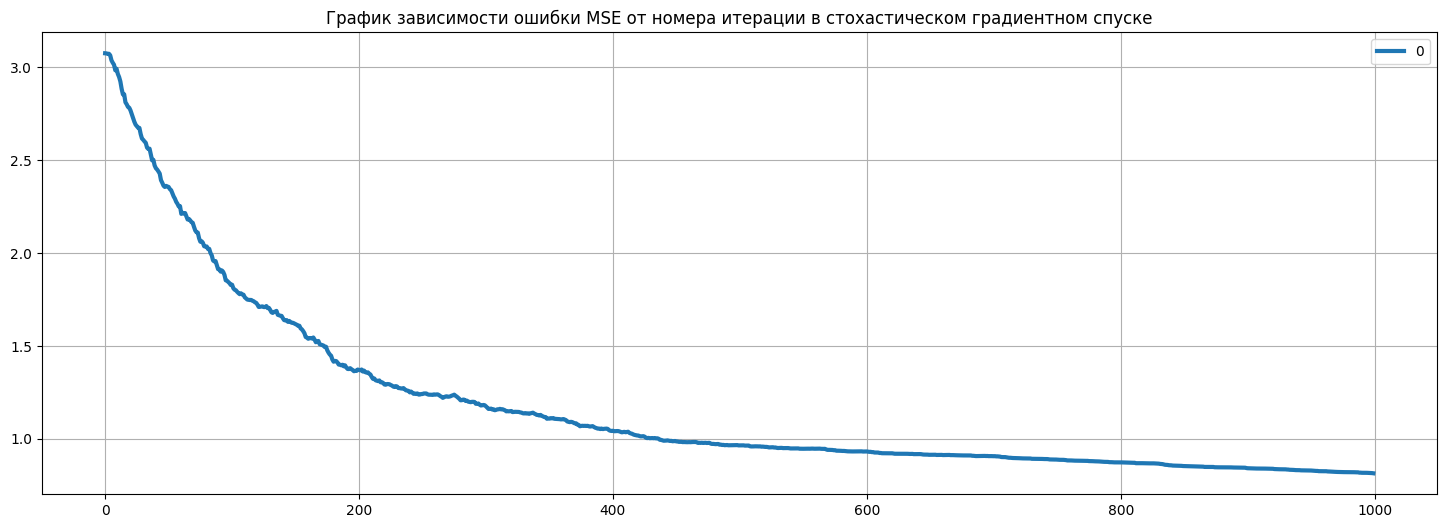

In [ ]:
# ваш код
import pandas as pd

# Модификация функции стохастического градиентного спуска с новыми параметрами
def stochastic_gradient_descent(X, y, w_initial, eta, max_iter, tolerance, seed=None):
    np.random.seed(seed)  # Устанавливаем seed для воспроизводимости
    w = w_initial.copy()  # Инициализация весов
    m = X.shape[0]  # Количество наблюдений
    errors = []  # Список для фиксации ошибок
    iter_count = 0  # Счетчик итераций

    # Инициализируем расстояние между весами
    prev_w = np.inf

    while iter_count < max_iter:
        train_ind = np.random.randint(0, m)
        w = stoch_grad_step(X, y, w, train_ind, eta)

        y_pred = X @ w
        error = mse_error(y, y_pred)
        errors.append(error)

        distance = np.linalg.norm(w - prev_w)

        if distance < tolerance:
            print(f"Конвергенция достигнута на итерации {iter_count + 1}")
            break

        prev_w = w
        iter_count += 1

    return w, errors

# Запуск стохастического градиентного спуска с новыми параметрами
w_initial = np.zeros(X.shape[1])  # Изначальные веса (вектор из нулей)
eta = 0.001  # Темп обучения
max_iter = 1000  # Максимальное количество итераций
tolerance = 1e-8  # Порог для прекращения работы

# Запуск стохастического градиентного спуска
w_optimal, cost_list = stochastic_gradient_descent(X, y, w_initial, eta, max_iter, tolerance, seed=42)

# Построение графика ошибки
error_df = pd.DataFrame(data=cost_list, index=np.arange(len(cost_list)))
error_df.plot(
    kind='line',
    figsize=(18, 6),
    title='График зависимости ошибки MSE от номера итерации в стохастическом градиентном спуске',
    grid=True,
    lw=3
);


# Вывод результата
#print("Оптимальные веса:", w_optimal)
#print("Список ошибок на каждой итерации:", cost_list)

**Выведите вектор весов, к которому сошелся метод.**

In [ ]:

print('Вектор весов, к которому сошелся метод: {}'.format(w_optimal))



Вектор весов, к которому сошелся метод: [ 0.60168685  0.49668342 -0.01577489  0.6929304   0.37129428]


**Вывод**
- Первое значение — это вес для свободного члена (или intercept).
- Остальные значения — это веса для признаков, которые были в исходной матрице X.
- Эти веса теперь оптимальны в рамках модели, основанной на минимизации ошибки (MSE) через стохастический градиентный спуск.

**Выведите среднеквадратичную ошибку на последней итерации.**

In [ ]:
# Среднеквадратичная ошибка на последней итерации
print('Среднеквадратичная ошибка на последней итерации: {:.6f}'.format(cost_list[-1]))

Среднеквадратичная ошибка на последней итерации: 0.813761


In [ ]:
import numpy as np

# Функция для вычисления MAE
def mae_error(y_true, y_pred):
    """
    Вычисление средней абсолютной ошибки (MAE).

    Parameters:
    y_true (array): Истинные значения целевой переменной
    y_pred (array): Прогнозируемые значения

    Returns:
    float: Средняя абсолютная ошибка
    """
    return np.mean(np.abs(y_true - y_pred))

# 1. Для модели стохастического градиентного спуска (SGD)
# Прогнозы для модели SGD
y_pred_sgd = X @ w_optimal

# MSE для модели SGD
mse_sgd = mse_error(y, y_pred_sgd)
mae_sgd = mae_error(y, y_pred_sgd)

# 2. Для модели линейной регрессии (sklearn)
# Предсказания для модели sklearn
model_sklearn = LinearRegression(fit_intercept=False)
model_sklearn.fit(X, y)
y_pred_sklearn = model_sklearn.predict(X)

# MSE для модели sklearn
mse_sklearn = mse_error(y, y_pred_sklearn)
mae_sklearn = mae_error(y, y_pred_sklearn)

# Вывод результатов
print(f"Модель SGD: MSE = {mse_sgd:.4f}, MAE = {mae_sgd:.4f}")
print(f"Модель sklearn: MSE = {mse_sklearn:.4f}, MAE = {mae_sklearn:.4f}")


Модель SGD: MSE = 0.8138, MAE = 0.7378
Модель sklearn: MSE = 0.0095, MAE = 0.0773


**Вывод**
- Модель sklearn (линейная регрессия от scikit-learn) показывает значительно лучшие результаты по обоим метрикам — MSE и MAE.
- Модель SGD имеет большие ошибки, что может быть связано с выбором слишком большого шага обучения (η), недостаточной сходимостью алгоритма
  или недостаточной настройкой параметров модели (например, числа итераций или начальных значений весов).